# Design prcticum G-34
## analysis of soil flow on experimental flume setup for different aspect ratios


In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2
import os
from matplotlib import image as img
from matplotlib import pyplot as plt

    Defining a function to exttract frames from the video

In [2]:
SEQUENCE_LENGTH = 40
import math
def frames_extraction(video_path):

    frames_list = []
    
    video_reader = cv2.VideoCapture(video_path)

    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    skip_frame=max(video_frames_count/SEQUENCE_LENGTH, 1)
    skip_frames_window = int(skip_frame)

    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read() 
        if not success:
            break
        normalized_frame = frame / 255
        frames_list.append(normalized_frame)
    video_reader.release()
    return frames_list, video_frames_count,skip_frames_window,skip_frame

    Extracting the frames from the videos

In [3]:
def display(image):
    plt.imshow(image)
    plt.show()

In [4]:
f_45,v,s,b=frames_extraction("gate2/fine/fine_45.mp4")
f_30,v1,s1,b1=frames_extraction("gate2/fine/fine_30.mp4")
f_15,v2,s2,b2=frames_extraction("gate2/fine/fine_15.mp4")

In [5]:
r_45,v3,s3,b3=frames_extraction("gate2/rough/rough_45.mp4")
r_30,v4,s4,b4=frames_extraction("gate2/rough/rough_30.mp4")
r_15,v5,s5,b5=frames_extraction("gate2/rough/rough_15.mp4")


    function to display frame

In [6]:
tot_frames=[v,v1,v2,v3,v4,v5]
print("Total frames in each video:")
print(tot_frames)

Total frames in each video:
[0, 0, 0, 0, 0, 0]


In [7]:
skip_wind=[s,s1,s2,s3,s4,s5]
print("Skip frame window for each video:")
print(skip_wind)


Skip frame window for each video:
[1, 1, 1, 1, 1, 1]


    Total frames in corresponding video

In [8]:
videos=[f_45,f_30,f_15,r_45,r_30,r_15]
frame_vid=[]
for i in videos:
    frame_vid.append(len(i))
print("No of Frames extracted for each Video:")
print(frame_vid)

No of Frames extracted for each Video:
[0, 0, 0, 0, 0, 0]


    Finding the cordinate for the vertical line where vertical velocity will be calculated 

In [9]:
def find_line(frame,cor):
    im=np.copy(frame)
    for i in range(800):
        for j in range(5):
            im[i,cor+j]=[1,0,0]
    display(im)
    
def find_hline(frame,cor):
    im=np.copy(frame)
    for i in range(400):
        for j in range(5):
            im[cor+j,i]=[1,0,0]
    display(im)

    Finding the cordinate for the vertical line where vertical velocity will be calculated 

In [10]:
find_line(f_45[0],520)
find_line(f_30[32],520)
find_line(f_15[32],520)

find_line(r_45[32],520)
find_line(r_30[30],520)
find_line(r_15[32],520)


IndexError: list index out of range

    Finding the cordinate for the horizontal line where horizontal velocity will be calculated 

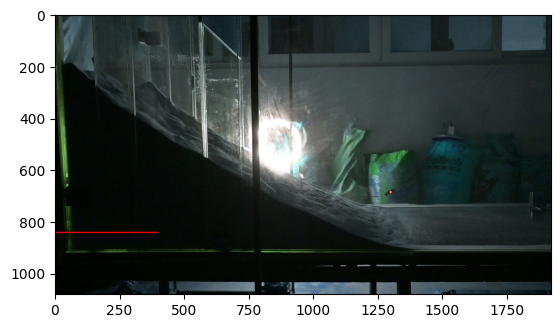

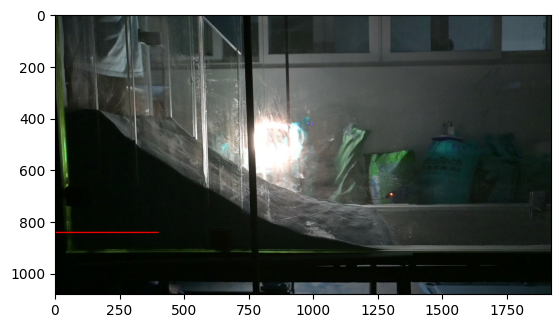

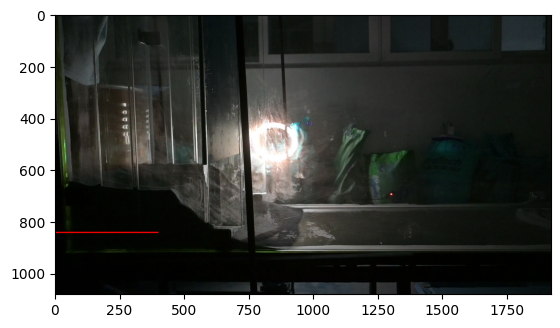

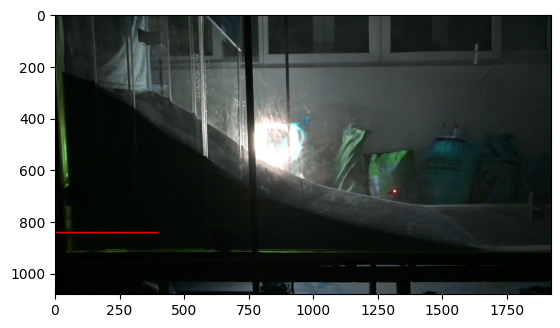

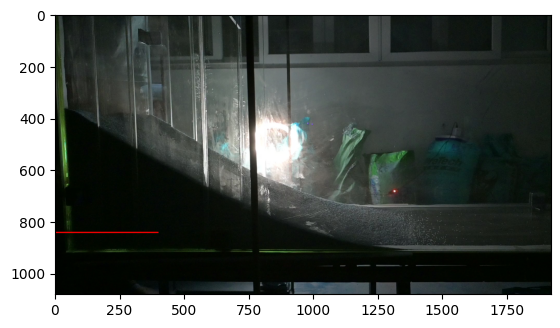

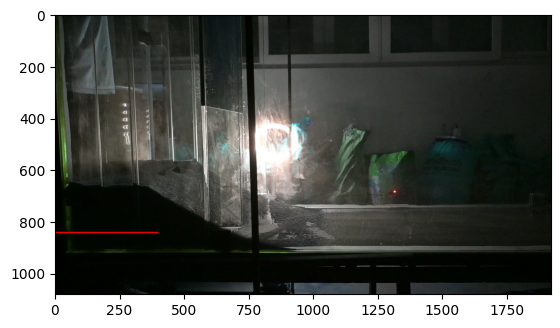

In [ ]:
find_hline(f_45[32],840)
find_hline(f_30[32],840)
find_hline(f_15[32],840)

find_hline(r_45[32],840)
find_hline(r_30[30],840)
find_hline(r_15[32],840)

    find pixel per length 


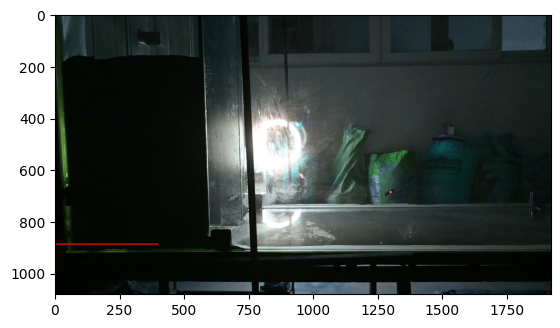

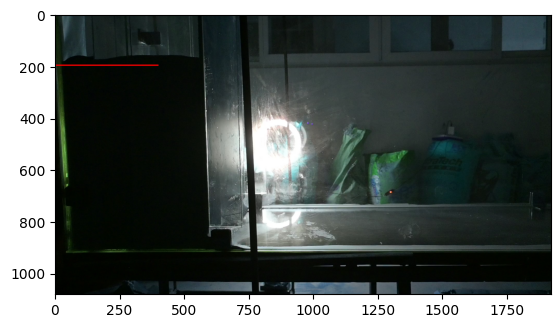

The length one pixel covers 0.6521739130434783 mm


In [ ]:
find_hline(f_45[1],885)
find_hline(f_45[1],195)

print("The length one pixel covers", 450/690,"mm")

    Defining function to find the vertical and horizontal distance
#### Function that travels on a particular coordinate to find the pixels with high RGB so we can find the pixels where the sand has not travelled and get a list of all the coordinates of all frames in videos till where the sand has travelled 

In [ ]:
def hrpixel(frame):
    for i in range(1650):
        k=0
        for j in frame[840][150+i]:
            if j>0.13 :
                k+=1
        if(k==3) :
            return 50+i
        

def vrpixel(frame):
    p=840
    while(p>=0):
        k=0
        for j in frame[p][520]:
            if j>0.12 :
                k+=1
        if(k==3) :
            return p
        p-=1
    return 0
        
def vdist(frames):
    dist=[]

    for frame in frames:
        dist.append(vrpixel(frame))

    return dist

def hdist(frames):
    dist=[]
    for frame in frames:
        dist.append(hrpixel(frame))
    return dist

    Defined a function to find the time difference between frames 

#### the function makes a list noting the time at which the frame is extracted by taking the gap between the frames being  skip window(frames between 2 extracted frames)/60(frames oer second) 

In [ ]:
def time_list(frame_vid,ind,skip_wind):
    time_axis=[]
    for i in range(frame_vid[ind]):
        time_fr=((i*skip_wind[ind])+1)/60
        time_axis.append(time_fr)
    return time_axis

In [ ]:
def xt(videos,ind,frame_vid,skip_wind):

    kk_v=vdist(videos[ind])
    kk_h=hdist(videos[ind])
    time_axis=time_list(frame_vid,ind,skip_wind)
    
    return kk_v,kk_h,time_axis

    preprocessing the experimental data 

In [ ]:
def helper(vel,time):
    m=0
    ind=0
    for i in range(len(vel)):
        if(vel[i]>m):
            m=vel[i]
            ind =i
    prev=0
    upd_vel=[]
    upd_time=[]
    for i in range(len(vel)):
        if vel[i]==0:
            continue
        elif i<=ind:
            if vel[i]>prev and vel[i]>=0:
                upd_vel.append(vel[i])
                upd_time.append(time[i])
        else:
            if vel[i]<prev and vel[i]>=0:
                upd_vel.append(vel[i])
                upd_time.append(time[i])
        prev=vel[i]
    return upd_vel,upd_time

    function for plotting the velocities  

In [ ]:
def plot_vt_fine(x_values, t_values,typ,i,vid):

    delta_x = [x_values[i+1] - x_values[i] for i in range(len(x_values)-1)]
    delta_t = [t_values[i+1] - t_values[i] for i in range(len(t_values)-1)]
    velocity = [delta_x[i]*(0.065)/ delta_t[i] for i in range(len(delta_x))]
    vel,time=helper(velocity,t_values) 
    plt.plot(time,vel, label=str(vid[i]))
    plt.xlabel('Time(s)')
    plt.ylabel('Velocity(cm/s)')
    
    plt.title('V-t graph in '+str(typ)+" direction")

In [ ]:
def plot_vt_rough(x_values, t_values,typ,i,vid):

    delta_x = [x_values[i+1] - x_values[i] for i in range(len(x_values)-1)]
    delta_t = [t_values[i+1] - t_values[i] for i in range(len(t_values)-1)]
    velocity = [delta_x[i]*(0.065)/ delta_t[i] for i in range(len(delta_x))]
    vel,time=helper(velocity,t_values) 
    plt.plot(time,vel, label=str(vid[i]))
    plt.xlabel('Time(s)')
    plt.ylabel('Velocity(cm/s)')
    
    plt.title('V-t graph in '+str(typ)+" direction")

In [ ]:
def all_plots(videos,ind,frame_vid,skip_wind,vid):
    dis_v,dis_h,time_ax=xt(videos,ind,frame_vid,skip_wind)
    if(ind<2):
        plot_vt_fine(dis_v,time_ax,"Vertical",ind,vid)
    else:
        plot_vt_rough(dis_v,time_ax,"Vertical",ind,vid)

    defining a function to find the velocity of soil in horizontal and vertical

In [ ]:
def vel_calculate(x_values, t_values):

    delta_x = [x_values[i+1] - x_values[i] for i in range(len(x_values)-1)]
    delta_t = [t_values[i+1] - t_values[i] for i in range(len(t_values)-1)]
    velocity = [delta_x[i]*(0.065)/ delta_t[i] for i in range(len(delta_x))]
    vel,time=helper(velocity,t_values) 
    return vel

In [ ]:
def vel_find(videos,ind,frame_vid,skip_wind):
    dis_v,dis_h,time_ax=xt(videos,ind,frame_vid,skip_wind)
    vel_v=vel_calculate(dis_v,time_ax)
    vel_h=vel_calculate(dis_h,time_ax)
    return vel_v,vel_h

    Finding the average velocities 

In [ ]:
vel_v=[]
vel_h=[]
for i in range(6):  
        t,z=vel_find(videos,i,frame_vid,skip_wind)
        vel_v.append(t)
        vel_h.append(z)

avg_vel_v=[]
for i in vel_v:
        avg_vel_v.append(np.average(i))
print(avg_vel_v)

avg_vel_h=[]
for i in vel_h:
        avg_vel_h.append(np.average(i))
print(avg_vel_h)


[21.666666666666664, 14.625000000000002, 10.104545454545459, 27.021428571428572, 26.216666666666665, 17.87499999999999]
[54.49166666666667, 22.059375000000003, 59.80000000000001, 69.22500000000002, 24.844444444444452, 47.28750000000001]


    Finding the max velocities  

In [ ]:
max_vel_v=[]
for i in vel_v:
        max_vel_v.append(np.max(i))
print(max_vel_v)

max_vel_h=[]
for i in vel_h:
        max_vel_h.append(np.max(i))
print(max_vel_h)


[120.89999999999989, 81.90000000000002, 37.05000000000001, 96.52500000000003, 94.90000000000002, 60.44999999999992]
[174.20000000000024, 85.80000000000003, 156.00000000000003, 198.90000000000003, 102.70000000000002, 165.75000000000006]


    Plotting the graph of velocities for each frame for fine sand 

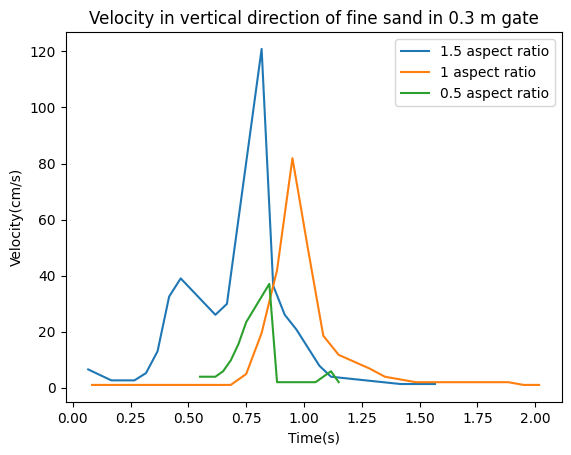

In [ ]:
vid=['1.5 aspect ratio','1 aspect ratio','0.5 aspect ratio','1.5 aspect ratio','1 aspect ratio','0.5 aspect ratio']
for i in range(3):  
        all_plots(videos,i,frame_vid,skip_wind,vid)
plt.legend()
plt.title("Velocity in vertical direction of fine sand in 0.3 m gate")
plt.savefig("graph1b.png")
plt.show()

    Plotting the graph of velocities for each frame for coarse sand 

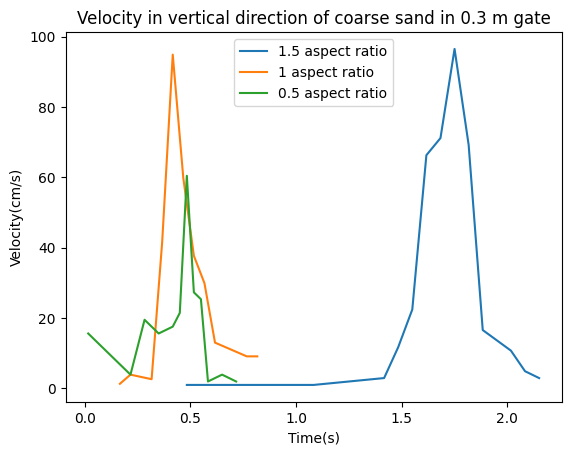

In [ ]:
for i in range(3,len(vid)):
        all_plots(videos,i,frame_vid,skip_wind,vid)
plt.legend()
plt.title("Velocity in vertical direction of coarse sand in 0.3 m gate")
plt.savefig("graph2b.png")
plt.show()

In [ ]:
def plot_bar1(list1, list2,labels,t):
    if labels is None:
        labels = [str(i) for i in range(1, min(len(list1), len(list2)) + 1)]
    
    x = range(len(labels))
    
    plt.bar(x, list1, width=0.4, align='center', label='Fine sand')
    plt.bar(x, list2, width=0.4, align='edge', label='coarse sand')
    
    plt.ylabel('velocity(cm/s)')
    plt.title(t)
    plt.xticks(x, labels)
    plt.legend()
    plt.show()

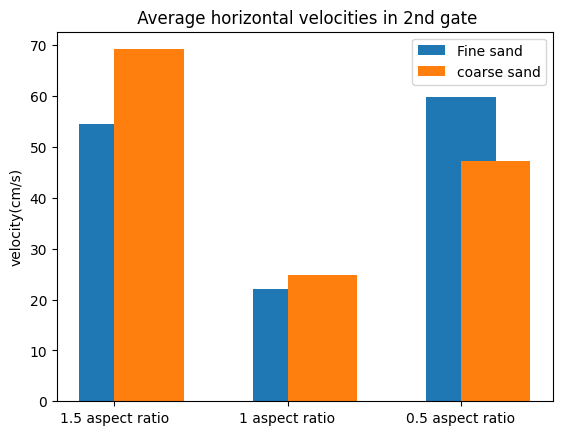

In [ ]:
vid_upd=['1.5 aspect ratio','1 aspect ratio','0.5 aspect ratio']
plot_bar1(avg_vel_h[0:3],avg_vel_h[3:len(avg_vel_h)] ,vid_upd," Average horizontal velocities in 2nd gate")
plt.show()

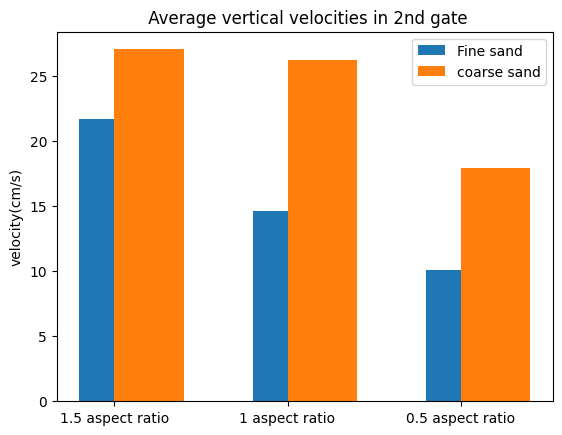

In [ ]:
vid_upd=['1.5 aspect ratio','1 aspect ratio','0.5 aspect ratio']
plot_bar1(avg_vel_v[0:3],avg_vel_v[3:len(avg_vel_h)] ,vid_upd," Average vertical velocities in 2nd gate")
plt.show()

    Importing the data of the 1st gate

In [ ]:
import pandas as pd
k_v = pd.read_csv('k_v.csv').values.tolist()
print(k_v)

[[17.653846153846153], [6.627272727272728], [22.162500000000005], [15.12]]


In [ ]:
import pandas as pd
k_h = pd.read_csv('k_h.csv').values.tolist()
print(k_h)

[[51.12], [30.299999999999983], [63.99000000000002], [46.61999999999999]]


In [ ]:
avg_f_v=[17.653846153846153,6.627272727272728]
avg_c_v=[22.162500000000005, 15.12]

avg_f_h=[51.12, 30.299999999999983]
avg_c_h=[63.99000000000002,46.61999999999999]

In [ ]:
def plot_bar1(list1, list2,labels,t):
    if labels is None:
        labels = [str(i) for i in range(1, min(len(list1), len(list2)) + 1)]
    
    x = range(len(labels))
    
    plt.bar(x, list1, width=0.4, align='center', label='0.3 m gata')
    plt.bar(x, list2, width=0.4, align='edge', label='0.15 m gate')
    
    plt.ylabel('velocity(cm/s)')
    plt.title(t)
    plt.xticks(x, labels)
    plt.legend()
    plt.show()

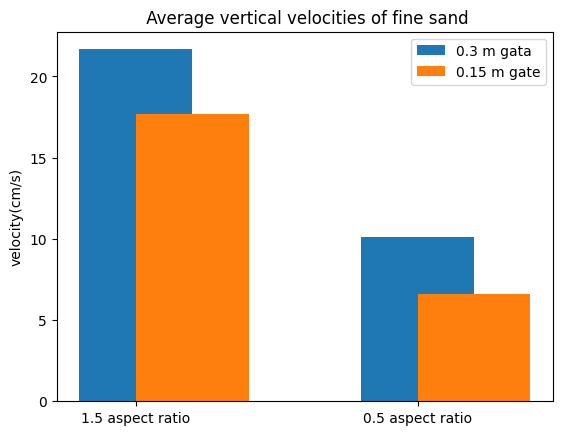

In [ ]:
vid_upd=['1.5 aspect ratio','0.5 aspect ratio']
plot_bar1([avg_vel_v[0],avg_vel_v[2]],avg_f_v ,vid_upd," Average vertical velocities of fine sand")
plt.show()

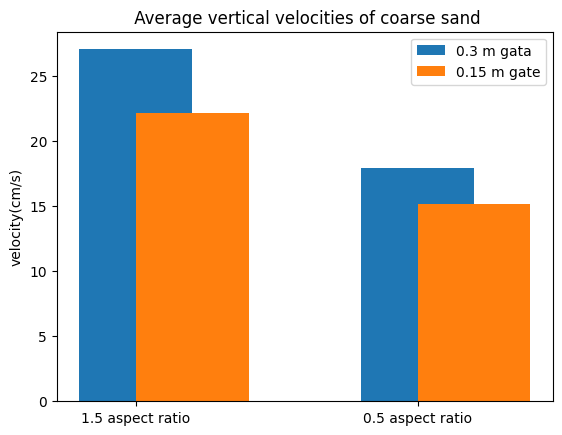

In [ ]:
vid_upd=['1.5 aspect ratio','0.5 aspect ratio']
plot_bar1([avg_vel_v[3],avg_vel_v[5]],avg_c_v ,vid_upd," Average vertical velocities of coarse sand")
plt.show()

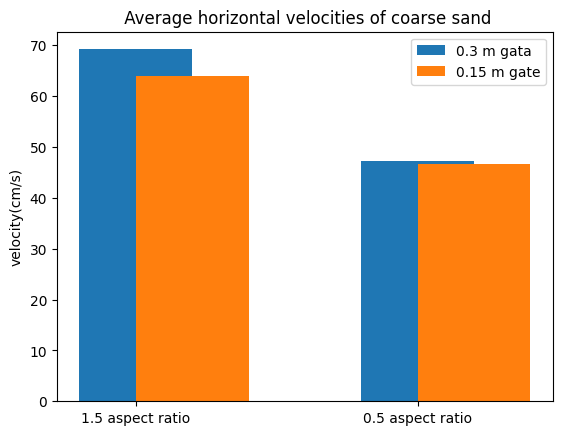

In [ ]:
vid_upd=['1.5 aspect ratio','0.5 aspect ratio']
plot_bar1([avg_vel_h[3],avg_vel_h[5]],avg_c_h ,vid_upd," Average horizontal velocities of coarse sand")
plt.show()

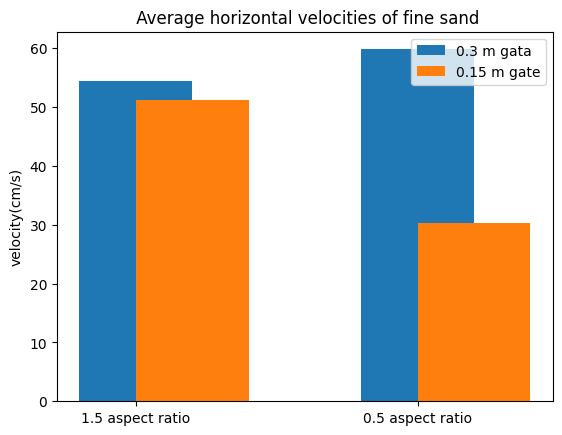

In [ ]:
vid_upd=['1.5 aspect ratio','0.5 aspect ratio']
plot_bar1([avg_vel_h[0],avg_vel_h[2]],avg_f_h ,vid_upd," Average horizontal velocities of fine sand")
plt.show()